# Comparative analysis of the use of AI in finance such as the Portfolio Optimisation Problem

**Author: Dwayne Rosario Fernandes**

This project embarks on an incisive exploration and comparative examination of a broad spectrum of methods encompassing both traditional statistical models like Mean-Variance optimisation and cutting-edge artificial intelligence paradigms, specifically deep learning and reinforcement learning techniques. The end goal is to discover the most effective approach to optimising a portfolio of financial assets, striking an optimal balance between maximising returns and minimising the inherent risk and volatility. In essence, this research seeks to unveil techniques that transform the science of portfolio management into an art, enabling unprecedented returns on investment while mitigating associated risks.


**Notebook Index**

0. Data Collection

1. Equal Weight Investing

2. Minimum Variance Portfolio Using Mean-Variance Optimization (MVO)

3. Maximum Sharpe Ratio Portfolio Using Mean-Variance Optimization (MVO)

4. Probabilistic Approach to Portfolio Optimization Using Monte-Carlo Simulation

5. Cluster-Based Portfolio Optimization Using Hierarchical Risk Parity (HRP)

6. Asset-Weights Allocation Using Long Short-Term Memory (LSTM) Networks

7. Asset-Weights Allocation Using Reinforcement Learning

8. Asset-Weights Allocation Using Auto-Encoders an unsupervised Neural Network approach

9. Performance analysis of the incorporated Allocation strategies


In [27]:
# import the necessary python libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Visualisation Libraries
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Utility Scripts
from data_loader import get_closing_prices
from utils import *

**Obtaining the historical stock prices data for stocks in a portfolio**

### 0. Data Collection

In the first step, we concentrate on data collection. This task involves acquiring historical pricing data for a selected portfolio of stocks. For the study, I have chosen the top 10 large-cap stocks based on their market capitalization, which are:

AAPL: Apple Inc., Technology

MSFT: Microsoft Corporation, Technology

AMZN: Amazon.com, Inc., Consumer Discretionary/Technology

GOOG: Google LLC (Alphabet Inc), Communication Services/Technology

META: Meta Platforms Inc., Communication Services/Technology

NVDA: NVIDIA Corporation, Technology

V: Visa Inc., Financials

JNJ: Johnson & Johnson, Health Care

WMT: Walmart Inc., Consumer Staples

PG: Procter & Gamble Co., Consumer Staples

This selection offers us a diverse mix of companies operating across different sectors, thereby giving an extensive spectrum to analyse. I fetch daily closing price data, adjusted for dividends and splits, for a period extending from '2013-01-01' to '2023-08-25'.

I do this by utilising the Yahoo Finance Python library (yfinance) to retrieve historical data due to its ease of use and the extensive range of data it provides.

In [28]:
comparison = {'Allocation Method':[], 'Return %':[], 'Volatility %':[], 'Sharpe Ratio':[], 'Weights':[]}

# Selecting the top-10 large-cap stocks
tickers = "AAPL MSFT AMZN GOOG META NVDA V JNJ WMT PG"
n_stocks = len(tickers.split(" "))


# date range of the stocks
start_date = '2013-01-01'
end_date = '2022-08-25'
todays_date = datetime.today().strftime('%Y-%m-%d')
todays_date = '2023-08-25'
# time_interval = 'daily'
time_interval = '1d'

# Create the data-source object and fetch the stocks data
# df = get_closing_prices(tickers, start_date, todays_date, time_interval)

data = yf.download(tickers, start=start_date, end=todays_date, interval="1d")

# Creating the Dataframe
df2 = data['Adj Close'] # 10 years of historical pricing data
df = df2.loc[:end_date] # 9 years of historical pricing data
print(f'Shape of training data (9 yrs of daily data): {df.shape}')

[*********************100%***********************]  10 of 10 completed
Shape of training data (9 yrs of daily data): (2430, 10)


This code block visualises the historical stock data of all the companies chosen for portfolio optimisation. The x-axis represents time (Date), starting from the start_date and ending at the end_date specified earlier. The y-axis corresponds to the closing price ($) of the stock  for each respective date.

In [29]:
# Visualising the Stocks Data
viz_stocks(df,title = 'Historical Stock Prices', xtitle='Date',ytitle='Closing Price (USD)' )

**Calculating the Daily Returns**

For each stock, I calculate the daily return, which is how much the price has changed compared to the previous day. And the following code block shows a visualisation of the same.

In [30]:
returns = df.pct_change()
returns

AAPL      AMZN      GOOG       JNJ      META      MSFT  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.012623  0.004547  0.000581 -0.001412 -0.008214 -0.013396   
2013-01-04 -0.027855  0.002592  0.019760  0.011451  0.035650 -0.018716   
2013-01-07 -0.005882  0.035925 -0.004363 -0.002096  0.022949 -0.001870   
2013-01-08  0.002692 -0.007748 -0.001974  0.000140 -0.012237 -0.005246   
...              ...       ...       ...       ...       ...       ...   
2022-08-19 -0.015102 -0.028602 -0.022671  0.015231 -0.038360 -0.013854   
2022-08-22 -0.023029 -0.036244 -0.025821 -0.003508 -0.029233 -0.029355   
2022-08-23 -0.002029  0.003003 -0.002607 -0.008712 -0.011898 -0.004717   
2022-08-24  0.001794  0.001347 -0.000610 -0.003311  0.013345 -0.002351   
2022-08-25  0.014923  0.026009  0.026155  0.009361  0.033811  0.011096   

                NVDA        PG         V       WMT  
Date                                                
2013-01-02       NaN       NaN       NaN       NaN  
2013-01-03  0.000787 -0.006341  0.000772 -0.006355  
2013-01-04  0.032993  0.002030  0.008167  0.003779  
2013-01-07 -0.028897 -0.006802  0.007144 -0.009557  
2013-01-08 -0.021926 -0.001603  0.009310  0.002777  
...              ...       ...       ...       ...  
2022-08-19 -0.049220 -0.000267 -0.011289 -0.014741  
2022-08-22 -0.045661 -0.002671 -0.019782 -0.017881  
2022-08-23  0.008630 -0.019286 -0.008676 -0.004236  
2022-08-24  0.002386 -0.004302 -0.000629  0.007239  
2022-08-25  0.040123 -0.000823  0.015242  0.006668  

[2430 rows x 10 columns]

In [31]:
# Create a figure of the Daily returns
viz_stocks(returns,title = 'Daily Returns of the Stocks', xtitle='Date',ytitle='Daily Returns (USD)' )

In [32]:
returns_cumsum = np.cumsum(returns)

# visualise the cumulative returns
viz_stocks(returns_cumsum,title = 'Cumulative Returns of the Stocks', xtitle='Date',ytitle='Daily Cumulative Returns (USD)' )

**Displaying the annualised Covariance Matrix**

Covariance is a measure of the directional relationship between two asset returns. It forms the core component for Modern Portfolio Theory (MPT) computations. The covariance matrix is used in the portfolio optimisation process to estimate the variance (and hence, the risk) of a portfolio of assets.

By multiplying the covariance matrix by 252, we are annualising the covariance. The number 252 is used because there are usually 252 trading days in a year for the US markets. 

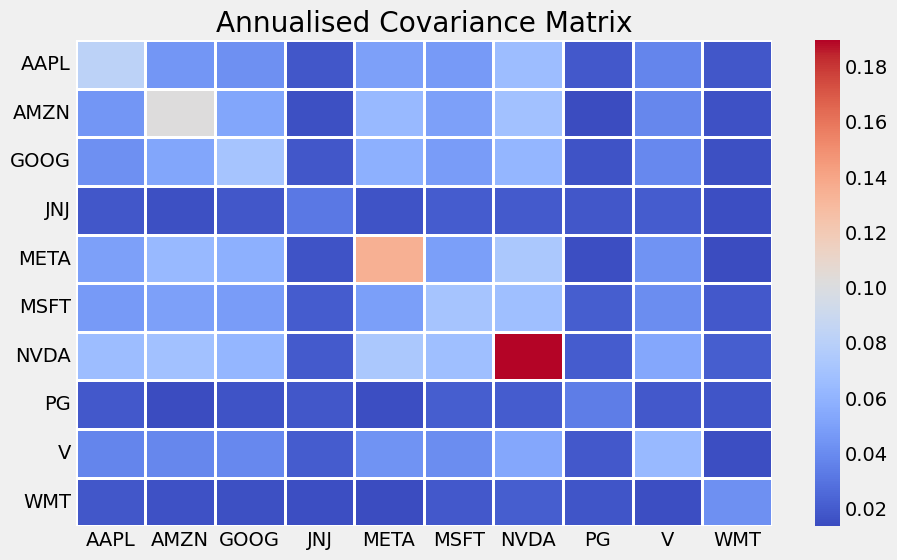

In [33]:
cov_matrix_annual = returns.cov() * 252 #where 252 is the number of business days

# Visualise the Annualised Covariance Matrix
viz_cov_matrix(cov_matrix_annual, 'Annualised Covariance Matrix')

**Calculating the Variance of the Portfolio**

![Formula for Variance of a Portfolio](https://i.stack.imgur.com/U4B9I.png)

### 1. Equal Weight Investing

 Setting up an equal-weighted investment strategy. This is one of the simplest portfolio allocation methods, where you assign an equal proportion of your investment capital to each asset in the portfolio. This method assumes that all stocks have the same potential for return.

In [34]:
# initialising the weights of the assets in the portfolio 
# balanced weights (initially all weighing the same)

equal_weights = np.array([1/n_stocks for t in tickers.split(" ")])
equal_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Variance, in the context of portfolio theory, is a measurement of portfolio risk or dispersion. It is a statistic that measures how far a set of numbers (i.e., portfolio returns in this case) are spread out from their average. A high variance indicates that the portfolio's returns can be drastically different, signaling a higher risk. Conversely, a low variance indicates that the returns are less dispersed and hence, the portfolio risk is low.

In [35]:
# Calculating the variance of the equal-weighted Portfolio
port_variance = np.dot(equal_weights.T, np.dot(cov_matrix_annual,equal_weights))
port_variance

0.03833589813032696

**Calculating the Volatility of the Portfolio**

Volatility, in finance, represents the degree of variation of a trading price series over time. It is often used as a measure of risk. In the context of portfolio theory, it's an indication of a portfolio's risk or dispersion from the mean.

It can be done by taking the square root of the portfolio variance

In [36]:
# Calculating the volatility (std dev of the porfolio)
port_volitility = np.sqrt(port_variance)
port_volitility

0.19579555186552874

**Calculating the mean Portfolio Returns**

The portion of your code here calculates the annual portfolio return. This is essentially an estimate of how much the portfolio is expected to return over the course of one year. It's calculated as the weighted average of the expected returns of all the assets in the portfolio.

![Formula for the returns of a portfolio](https://pressbooks.pub/app/uploads/sites/4438/2022/02/work-14.15.png)

In [37]:
# Calculating the annual portfolio return
port_simple_return = np.sum(returns.mean() * equal_weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.24597112528473017

**Sharpe Ratio**

The Sharpe Ratio is a measure of risk-adjusted return, which is a way to examine the performance of an investment by adjusting for its risk. It's a useful way to compare the return of one investment with that of another, as it takes into account not just the returns, but also the additional risk taken to achieve those returns.

The formula for the Sharpe Ratio is:

Sharpe Ratio = (Expected portfolio return - Risk-free rate) / Portfolio standard deviation

In [38]:
equal_weights_sr = port_simple_return/port_volitility
equal_weights_sr

1.256265134427884

**Displaying the Return, Volatility and Variance of the equal-weighting Portfolio**

This block of code provides a visual representation of the asset allocation of your portfolio under the equal-weights strategy, and it prints out some key metrics to assess portfolio performance. These include expected annual return, annual volatility (or risk), annual variance, and the Sharpe Ratio.

In [39]:
plot_asset_allocation(df.columns, equal_weights,"Equal-Weights")
# Displaying the expected return, volatility and variance

print(f'Expected annual return: {port_simple_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_volitility*100 :.2f}%')
print(f'Annual variance: {port_variance*100 :.2f}%')
print(f'Sharpe Ratio: {equal_weights_sr:.2f}%')

# saving in the comparison dictionary for performance analysis
comparison['Allocation Method'].append('Equal Weighting')
comparison['Return %'].append(round(port_simple_return*100,2))
comparison['Volatility %'].append(round(port_volitility*100,2))
comparison['Sharpe Ratio'].append(equal_weights_sr)
comparison['Weights'].append(equal_weights)

Expected annual return: 24.60%
Annual volitility or risk: 19.58%
Annual variance: 3.83%
Sharpe Ratio: 1.26%


### 2. Mean-Variance Optimisation (MVO) for a Minimum Variance Portfolio

Introduced by Harry Markowitz, it's the basis for modern portfolio theory. It aims to create a portfolio that maximizes expected return for a given level of risk or minimizes risk for a given level of expected return.

The EfficientFrontier class in the PyPortfolioOpt library in Python is based on modern portfolio theory (MPT), specifically Markowitz's mean-variance optimisation model. The actual optimisation is done using a convex optimisation solver. PyPortfolioOpt uses the cvxpy library to define and solve the optimisation problem (Max Sharpe Ration). The result of the optimisation is the set of weights that satisfy the objective (max Sharpe Ratio).

In [162]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA

In [163]:
# Optimising the Portfolio for a min-variance Portfolio

# Expected returns
mu = expected_returns.mean_historical_return(df)

# Annalised covariance matrix of asset returns
S = risk_models.sample_cov(df)

# optimising for the minimum risk portfolio
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
min_var_weights  = ef.clean_weights() # performs rounding
print(min_var_weights)

plot_asset_allocation(df.columns, list(min_var_weights.values()), "MVO for Min Variance")

min_var_performance = ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.01213), ('AMZN', 0.04196), ('GOOG', 0.04073), ('JNJ', 0.35536), ('META', 0.01393), ('MSFT', 0.0), ('NVDA', 0.0), ('PG', 0.27013), ('V', 0.02862), ('WMT', 0.23715)])


Expected annual return: 13.0%
Annual volatility: 14.8%
Sharpe Ratio: 0.74


In [164]:
comparison['Allocation Method'].append('MVO for min Variance')
comparison['Return %'].append(round(ef.portfolio_performance()[0]*100,2))
comparison['Volatility %'].append(round(ef.portfolio_performance()[1]*100,2))
comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
comparison['Weights'].append(list(min_var_weights.values()))

### 3. Mean-Variance Optimisation (MVO) for a Maximum Sharpe Ratio Portfolio

In [165]:
# Optimising the portfolio for a Max-sharpe ratio using MPO

ef2 = EfficientFrontier(mu, S)
weights = ef2.max_sharpe(risk_free_rate=0)
max_sharpe_weights  = list(ef2.clean_weights().values()) # performs rounding
print(max_sharpe_weights)

plot_asset_allocation(df.columns, list(max_sharpe_weights), "MVO for max Sharpe")

max_sharpe_performance = ef2.portfolio_performance(verbose = True)



comparison['Allocation Method'].append('MVO for max Sharpe')
comparison['Return %'].append(round(max_sharpe_performance[0]*100,2))
comparison['Volatility %'].append(round(max_sharpe_performance[1]*100,2))
comparison['Sharpe Ratio'].append(round(max_sharpe_performance[2],2))
comparison['Weights'].append(max_sharpe_weights)

[0.0845, 0.06176, 0.0, 0.22172, 0.0, 0.25488, 0.32521, 0.05193, 0.0, 0.0]


Expected annual return: 32.2%
Annual volatility: 23.8%
Sharpe Ratio: 1.35


/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



**Visualising the Efficient Frontier**

The Critical Line Algorithm is an algorithm used to compute the efficient frontier for a set of assets in a portfolio.

![Efficient Frontier](../Extras/efficient_frontier.png)

In [166]:
import plotly.express as px
import pandas as pd

# Get the efficient frontier points
cla = CLA(mu, S)
(ret, vol, _) = cla.efficient_frontier()

# Prepare the data for the efficient frontier
efficient_frontier_data = pd.DataFrame({
    'Volatility': vol,
    'Expected Returns': ret,
    'Sharpe Ratio': (np.array(ret)/np.array(vol)),
})

# Create the scatter plot for the efficient frontier
fig = px.scatter(efficient_frontier_data, x='Volatility', y='Expected Returns', color='Sharpe Ratio', color_continuous_scale='YlGnBu')

# Add the individual assets
individual_vol = np.sqrt(np.diag(S))
individual_ret = mu.values
for i in range(len(individual_vol)):
    fig.add_scatter(x=[individual_vol[i]], y=[individual_ret[i]],name=df.columns[i], mode='markers', marker=dict(symbol='x', size=12, color='red'), showlegend=False)

# Set labels and title
fig.update_layout(
    title='Efficient Frontier',
    xaxis_title='Volatility',
    yaxis_title='Expected Returns',
    coloraxis_colorbar_title='Sharpe Ratio'
)

# Show the plot
fig.show()

### 4. Probabilistic Method: Monte Carlo Simulation

A probabilistic method where thousands of random portfolio combinations are tested to identify optimal portfolios.

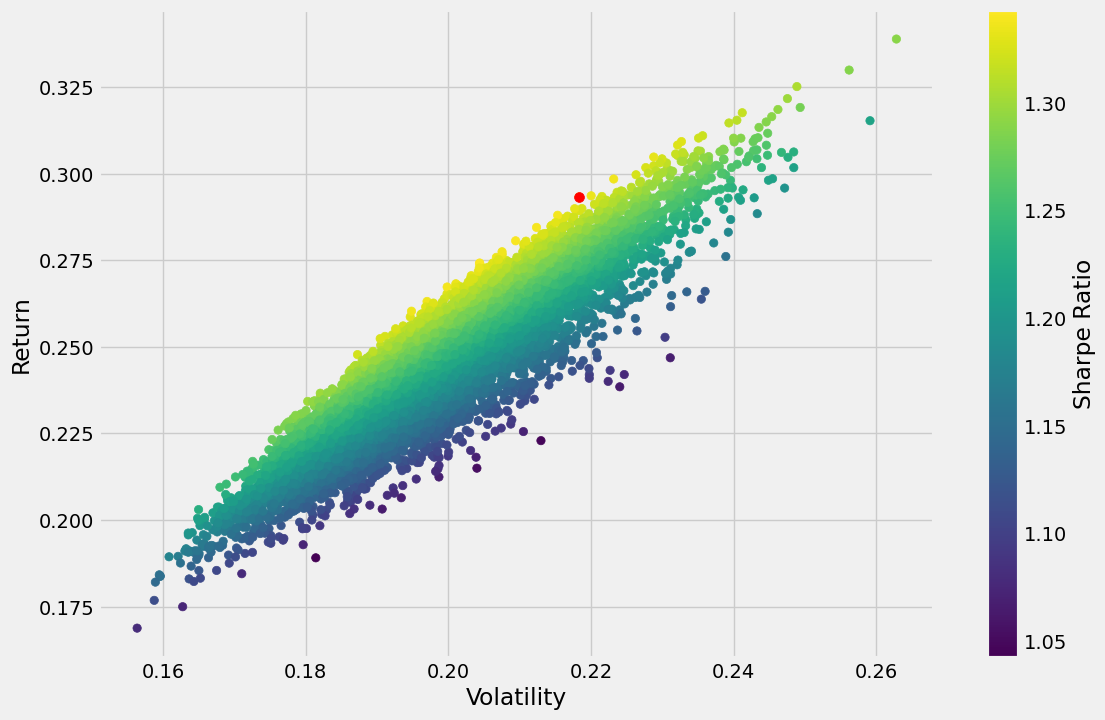

In [167]:

# Assume df is your DataFrame with historical stock prices.

# Calculate daily returns
returns = df.pct_change()

# Number of Portfolios to simulate
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(df.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Risk-free rate for Sharpe Ratio, you can adjust this
# risk_free_rate = 0.001
risk_free_rate = 0

for x in range(num_portfolios):

    # Weights
    weights = np.array(np.random.random(len(tickers.split(" "))))
    weights = weights / np.sum(weights)
    
    # Save weights
    all_weights[x, :] = weights

    # Expected return
    ret_arr[x] = np.sum((returns.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x] - risk_free_rate) / vol_arr[x]

# Plotting the data with a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Marking the point with the highest Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50)  # Red dot

plt.show()



In [168]:
ms_weights = all_weights[sharpe_arr.argmax()] # monte-carlo simulation to select weights with the highest SR

plot_asset_allocation(df.columns, ms_weights, "Monte-Carlo Simulation")

# Print weights for the portfolio with the highest Sharpe Ratio
print(f'Expected annual return: {max_sr_ret*100 :.2f}%')
print(f'Annual volitility or risk: {max_sr_vol*100 :.2f}%')
print(f"Max Sharpe Ratio is {sharpe_arr.max()}")
print(f"Optimal weights are {ms_weights}")

Expected annual return: 29.33%
Annual volitility or risk: 21.83%
Max Sharpe Ratio is 1.3433155475489365
Optimal weights are [0.03832738 0.10804521 0.04357687 0.14911979 0.01051237 0.12804264
 0.28439059 0.1065256  0.04085979 0.09059977]


In [169]:
comparison['Allocation Method'].append('Monte Carlo Simulation')
comparison['Return %'].append(round(max_sr_ret*100,2))
comparison['Volatility %'].append(round(max_sr_vol*100,2))
comparison['Sharpe Ratio'].append(sharpe_arr.max())
comparison['Weights'].append(all_weights[sharpe_arr.argmax()])

### 5. Hierarchical Risk Parity for Portfolio Optimisation


Hierarchical Risk Parity (HRP) is a portfolio optimisation technique which takes into account the hierarchical structure in the data when creating portfolios. The Hierarchical Risk Parity method aims to construct a diversified, risk-balanced portfolio. It is especially useful when you believe the assets have some underlying hierarchical structure, for instance, stocks could be grouped into different sectors, and different sectors have different performance in different market conditions.

**Hierarchical Clustering**: The HRP algorithm first uses a hierarchical clustering algorithm to find clusters of assets that have similar price movements. This is done by treating each asset as a leaf in a tree and iteratively merging the leaves that have the smallest Euclidean distance between them until there is only one root node left.

**Quasi-Diagonalization**: The covariance matrix is then reordered to bring assets from the same cluster closer together, forming a quasi-diagonal matrix. The idea is to place higher weights on assets that are less correlated, leading to a more diversified portfolio.

**Recursive Bisection**: Finally, the algorithm assigns portfolio weights by recursively splitting the clusters and distributing the assets based on the inverse-variance rule. This process ensures that the portfolio is well-diversified across the different asset clusters.

In [170]:
# Import the required libraries
from pypfopt import HRPOpt, risk_models, expected_returns

link_method = 'ward'

# Calculate the expected returns
returns = expected_returns.returns_from_prices(df)

# Calculate the covariance matrix
cov_matrix = risk_models.sample_cov(df)

# Create an instance of the HRPOpt class
hrp = HRPOpt(returns)

# Compute the weights
weights = hrp.optimize(linkage_method=link_method)

# Clean the weights, setting any weights whose absolute values are below the cutoff to zero, and rounding the rest.
hrp_weights = list(hrp.clean_weights().values())


/tmp/ipykernel_3506742/185403460.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



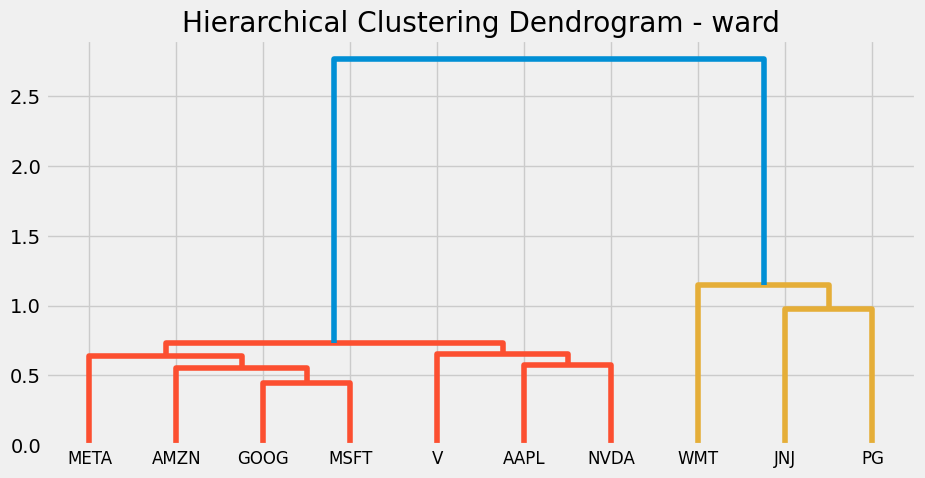

In [171]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical/agglomerative clustering
corr = cov_matrix.corr()  # Find the correlation matrix 
dist = ((1 - corr) / 2.)**0.5  # Find the distances 
link = sch.linkage(dist, method=link_method)  # Perform hierarchical/agglomerative clustering

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(link, labels=cov_matrix.columns)
plt.title(f'Hierarchical Clustering Dendrogram - {link_method}')
plt.show()


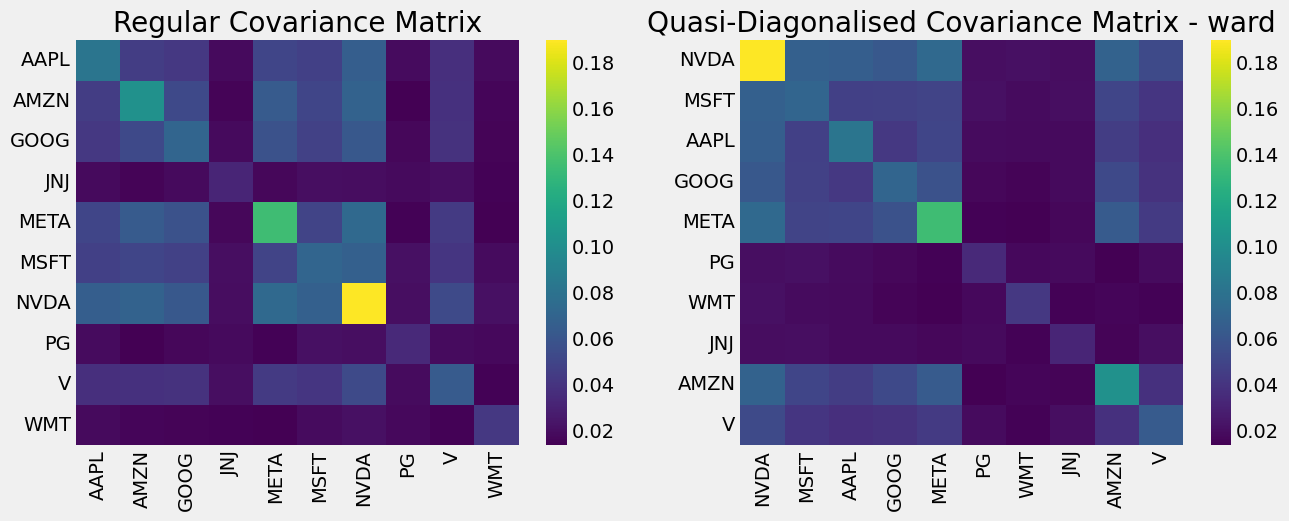

In [172]:
from scipy.cluster.hierarchy import leaves_list, linkage
from scipy.spatial.distance import pdist

# Calculate the regular covariance matrix
regular_cov_matrix = risk_models.sample_cov(df)

# Perform hierarchical/agglomerative clustering, using the 'single' linkage method
link = linkage(pdist(df.corr()), link_method)

# Get the order of rows/columns after quasi-diagonalization
order = leaves_list(link)

# Reorder the covariance matrix
quasi_diag_cov_matrix = regular_cov_matrix.iloc[order, order]

# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot the regular covariance matrix
sns.heatmap(regular_cov_matrix, cmap='viridis', ax=ax[0])
ax[0].set_title('Regular Covariance Matrix')

# Plot the quasi-diagonalized covariance matrix
sns.heatmap(quasi_diag_cov_matrix, cmap='viridis', ax=ax[1])
ax[1].set_title(f'Quasi-Diagonalised Covariance Matrix - {link_method}')

plt.show()

In [173]:

# visualise the allocation
plot_asset_allocation(df.columns,hrp_weights , "HRP")
# Get the portfolio performance
hrp_performance = hrp.portfolio_performance(verbose=True)

comparison['Allocation Method'].append('HRP')
comparison['Return %'].append(round(hrp_performance[0]*100))
comparison['Volatility %'].append(round(hrp_performance[1]*100))
comparison['Sharpe Ratio'].append(hrp_performance[2])
comparison['Weights'].append(hrp_weights)

Expected annual return: 19.9%
Annual volatility: 16.6%
Sharpe Ratio: 1.08


### 6. LSTM for Portfolio Optimisation

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that can capture long-term dependencies in sequence data. An LSTM can be used for predicting paterns in the prices and returns, which can then be used to optimise asset allocation in a portfolio.

In [8]:
from model import WeightSelectorLSTM
import tensorflow as tf
import os
import random

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

reset_random_seeds()

# to create a model, do: 
model = WeightSelectorLSTM()
# to get the optimized portfolio coefficients, do: 
lstm_weights = model.get_allocations(df)# where df is a DataFrame of closing prices of various assets

2023-08-05 23:53:21.296299: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 23:53:21.298388: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 23:53:21.336887: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 23:53:21.337595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 23:53:21.959128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: -0.0699
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: -0.0728
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: -0.0747
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: -0.0752
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: -0.0752
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 10/10
1/1 [==============================] - 1s 654ms/step


In [9]:
# Calculating the annual portfolio return
port_lstm_return = np.sum(returns.mean() * lstm_weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
# Calculating the variance of the Portfolio
port_variance = np.dot(lstm_weights.T, np.dot(cov_matrix_annual,lstm_weights))
port_lstm_volitility = np.sqrt(port_variance)
lstm_sr = port_lstm_return/port_lstm_volitility


# visualise the allocation
plot_asset_allocation(df.columns, lstm_weights, "LSTM")

# Displaying the expected return, volatility and sharpe ratio
print(f'Expected annual return: {port_lstm_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_lstm_volitility*100 :.2f}%')
print(f'Sharpe Ratio: {lstm_sr:.2f}%')


comparison['Allocation Method'].append('LSTM')
comparison['Return %'].append(round(port_lstm_return*100,2))
comparison['Volatility %'].append(round(port_lstm_volitility*100,2))
comparison['Sharpe Ratio'].append(lstm_sr)
comparison['Weights'].append(lstm_weights)

Expected annual return: 51.04%
Annual volitility or risk: 42.26%
Sharpe Ratio: 1.21%


### 7. Reinforcement Learning for Portfolio Optimisation

In [176]:
from stable_baselines3 import A2C
import gym
import numpy as np

class PortfolioEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, returns, window_size=1000):
        super(PortfolioEnv, self).__init__()

        # action and observation space
        # they are both vectors from R^{n} (n assets)
        n = returns.shape[1]
        self.action_space = gym.spaces.Box(low=0, high=1, shape=(n,))
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(window_size, n))

        self.returns = returns.values
        self.n = n
        self.window_size = window_size
        self.current_step = None

    def step(self, action):
        self.current_step += 1

        # normalize action space 
        weights = action / (np.sum(action) + 1e-8)

        # get return for the current portfolio
        portfolio_return = np.dot(self.returns[self.current_step], weights)

        reward = portfolio_return

        done = self.current_step >= len(self.returns) - 1
        info = {'portfolio_return': portfolio_return, 'weights': weights}

        obs = self._next_observation()

        return obs, reward, done, info

    def reset(self):
        self.current_step = 0
        return self._next_observation()

    def _next_observation(self):
        obs = self.returns[self.current_step:self.current_step + self.window_size]
        padded = np.pad(obs, ((self.window_size - obs.shape[0], 0), (0, 0)), 'constant', constant_values=0)
        return padded

# Assume `returns` is your DataFrame of returns
returns = returns.dropna()
env = PortfolioEnv(returns)

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

# to get the weights after training
obs = env.reset()
weights_list = []
for i in range(len(returns) - env.window_size):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    weights_list.append(info['weights'])
    if done:
        obs = env.reset()

# weights_df is a DataFrame that contains the weights of the assets at each timestep
weights_df = pd.DataFrame(weights_list, columns=returns.columns)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



------------------------------------
| time/                 |          |
|    fps                | 529      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -14.2    |
|    explained_variance | -0.343   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.592    |
|    std                | 0.998    |
|    value_loss         | 0.00198  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 527      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -14.2    |
|    explained_variance | -1.32    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.203    |
|

In [177]:
rl_weights = weights_df.iloc[-1].values
plot_asset_allocation(df.columns, rl_weights, 'RL')

# Calculating the returns of the RL-weighted Portfolio
rl_returns = np.sum(rl_weights * np.mean(returns,axis = 0)) * 252

# Calculating the volatility of the autoencoder-weighted Portfolio
rl_volatility = np.sqrt(np.dot(rl_weights.T, np.dot(cov_matrix_annual,rl_weights)))

# Calculating the sharpe ratio of the autoencoder-weighted Portfolio
rl_sr = rl_returns/ rl_volatility

# Displaying the expected return, volatility and sharpe ratio by the RL algorithm
print(f'Expected annual return: {rl_returns*100 :.2f}%')
print(f'Annual volitility or risk: {rl_volatility*100 :.2f}%')
print(f'Sharpe Ratio: {rl_sr:.2f}%')

comparison['Allocation Method'].append('Reinforcement Learning')
comparison['Return %'].append(round(rl_returns * 100, 2))
comparison['Volatility %'].append(round(rl_volatility * 100, 2))
comparison['Sharpe Ratio'].append(round(rl_sr, 2))
comparison['Weights'].append(rl_weights)

Expected annual return: 20.57%
Annual volitility or risk: 18.89%
Sharpe Ratio: 1.09%


### 8. AutoEncoders for Portfolio Optimisation

In [8]:
# Necessary Libraries
import os
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from scipy.optimize import minimize

# Define the random seed for reproducibility
seed_value = 42  
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Data Preprocessing
data = df
returns = data.pct_change().dropna()
scaler = MinMaxScaler()
returns_scaled = scaler.fit_transform(returns)

# Define a more complex Autoencoder Architecture
input_layer = Input(shape=(returns_scaled.shape[1],))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.3)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.3)(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.3)(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dropout(0.3)(decoded)
decoded = Dense(returns_scaled.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Compile and Train the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(returns_scaled, returns_scaled, epochs=10, verbose=0)

# Extract Encoded Features
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(returns_scaled)

# Calculate Covariance Matrix and Expected Returns based on Encoded Features
cov_matrix = np.cov(encoded_features.T)
exp_returns = np.mean(encoded_features, axis=0)

# Portfolio Optimization
def objective(weights): 
    return -np.sum(exp_returns*weights) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(len(tickers.split(" "))))
result = minimize(objective, n_stocks*[1./n_stocks], bounds=bounds, constraints=constraints)

# Print Optimized Portfolio Weights
ae_weights = result.x
print("Optimized Portfolio Weights:", ae_weights)

plot_asset_allocation(df.columns, ae_weights, 'Auto-Encoder')


# Calculating the returns of the autoencoder-weighted Portfolio
ae_returns = np.sum(ae_weights * np.mean(returns,axis = 0)) * 252

# Calculating the volatility of the autoencoder-weighted Portfolio
ae_volatility = np.sqrt(np.dot(ae_weights.T, np.dot(cov_matrix_annual,ae_weights)))

# Calculating the sharpe ratio of the autoencoder-weighted Portfolio
ae_sr = ae_returns/ ae_volatility

# Displaying the expected return, volatility and sharpe ratio by the Auto-Encoder
print(f'Expected annual return: {ae_returns*100 :.2f}%')
print(f'Annual volitility or risk: {ae_volatility*100 :.2f}%')
print(f'Sharpe Ratio: {ae_sr:.2f}%')

comparison['Allocation Method'].append('Auto-Encoder')
comparison['Return %'].append(round(ae_returns * 100, 2))
comparison['Volatility %'].append(round(ae_volatility * 100, 2))
comparison['Sharpe Ratio'].append(round(ae_sr, 2))
comparison['Weights'].append(ae_weights)

2023-08-06 14:58:16.373725: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-06 14:58:16.375654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 14:58:16.413319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 14:58:16.414010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 14:58:17.018810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

76/76 [==============================] - 0s 826us/step
Optimized Portfolio Weights: [1.67916857e-16 1.48502405e-16 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.92520758e-01 4.91497689e-01 3.15981553e-01
 0.00000000e+00 0.00000000e+00]


Expected annual return: 35.18%
Annual volitility or risk: 27.02%
Sharpe Ratio: 1.30%


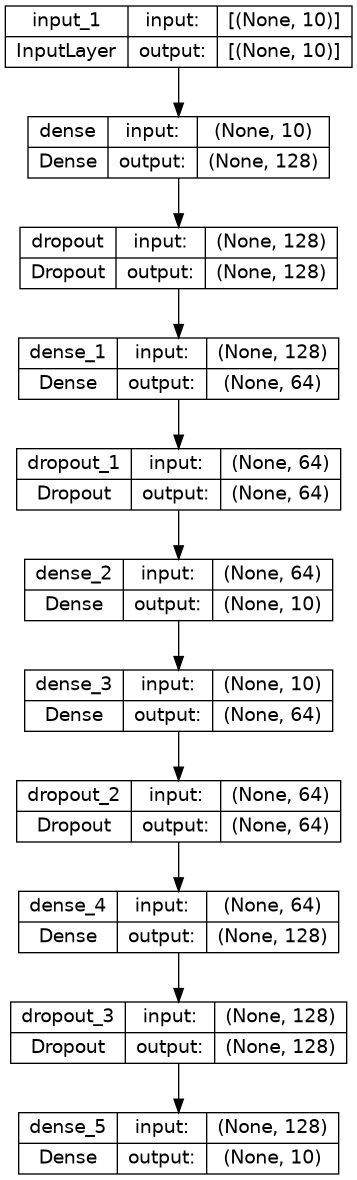

In [9]:
from tensorflow.keras.utils import plot_model
# Assuming 'model' is your Keras model
plot_model(autoencoder, to_file='autoencoder_model_plot.png', show_shapes=True, show_layer_names=True)

### 9. Performance Analysis of the incorporated Strategies

In [179]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

def invest(df, weights, method_name, invest_amt = 10000):
    total_val = invest_amt
    latest_prices = get_latest_prices(df)
    weights_ = {df.columns[i]: weights[i] for i in range(len(weights))}
    da = DiscreteAllocation(weights_, latest_prices, total_portfolio_value = total_val)

    allocation, leftover = da.greedy_portfolio()
    # print(f'Inital amount: £{total_val}')
    # print(f'Discrete allocation by {method_name}: {allocation}')
    # total_expenditure = total_val - leftover
    # print(f'Total Expenditure on stocks: £{round(total_expenditure,2)}')
    # print(f'Leftover: £{round(leftover,2)}')
    return allocation, leftover


def calc_portfolio_value(df, allocation, leftover):
    # Calculate total portfolio value
    new_prices = get_latest_prices(df) # Fetch the new prices
    # current_portfolio_value = sum(new_prices[ticker] * num_shares for ticker, num_shares in allocation.items()) + leftover
    current_portfolio_value = round(sum(new_prices[ticker] * num_shares for ticker, num_shares in allocation.items()),2)

    # print(f'Current Portfolio Value: £{current_portfolio_value}')

    return current_portfolio_value

res = pd.DataFrame(comparison)

allocations = []
port_values = []
profits = []

def test_performance(weights, name_method, invest_amt=10000):
    allocation, leftover = invest(df, weights, name_method, invest_amt) 
    pv = calc_portfolio_value(df2, allocation, leftover)
    investment = invest_amt - leftover
    allocations.append(investment)
    port_values.append(pv)
    profits.append(pv - investment)
  
for i, row in res.iterrows():
    test_performance(row['Weights'], row['Allocation Method'])

res[f'Investment Amount on {end_date}'] = allocations
res[f'Port_Values on {todays_date}'] = port_values
res['Profits'] = profits

In [180]:
res

Allocation Method  Return %  Volatility %  Sharpe Ratio  \
0         Equal Weighting     24.60         19.58      1.256265   
1    MVO for min Variance     12.96         14.80      0.740000   
2      MVO for max Sharpe     32.18         23.81      1.350000   
3  Monte Carlo Simulation     29.33         21.83      1.343316   
4                     HRP     20.00         17.00      1.075630   
5                    LSTM     51.04         42.26      1.207859   
6  Reinforcement Learning     20.57         18.89      1.090000   
7            Auto-Encoder     38.27         29.66      1.290000   

                                             Weights  \
0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...   
1  [0.01213, 0.04196, 0.04073, 0.35536, 0.01393, ...   
2  [0.0845, 0.06176, 0.0, 0.22172, 0.0, 0.25488, ...   
3  [0.03832737978089709, 0.10804521235435273, 0.0...   
4  [0.08313, 0.04593, 0.09901, 0.16482, 0.0508, 0...   
5  [0.00014270064, 0.027044492, 4.4284916e-05, 0....   
6  [0.3774953, 0.008544122, 0.0062917396, 0.0, 0....   
7  [2.545739976402889e-16, 0.11363504641064152, 0...   

   Investment Amount on 2022-08-25  Port_Values on 2023-08-25       Profits  
0                      9891.210556                   13191.61   3300.399444  
1                      9937.146729                   10969.33   1032.183271  
2                      9940.472534                   15882.19   5941.717466  
3                      9895.645142                   15370.67   5475.024858  
4                      9941.588470                   12102.12   2160.531530  
5                      9900.096390                   25277.00  15376.903610  
6                      9964.031952                   11232.85   1268.818048  
7                      9930.173172                   19489.75   9559.576828

In [181]:
allocation, leftover = invest(df, equal_weights, 'equal_weights')
calc_portfolio_value(df2, allocation, leftover)

13191.61

In [182]:
allocation, leftover = invest(df, list(min_var_weights.values()), 'min Var')
calc_portfolio_value(df2, allocation, leftover)

10969.33

In [183]:
allocation, leftover = invest(df, max_sharpe_weights, 'max Sharpe')
calc_portfolio_value(df2, allocation, leftover)

15882.19

In [184]:
allocation, leftover = invest(df, ms_weights, 'Monte Carlo Simulation')
calc_portfolio_value(df2, allocation, leftover)

15370.67

In [185]:
allocation, leftover = invest(df, hrp_weights, 'HRP')
calc_portfolio_value(df2, allocation, leftover)

12102.12

In [186]:
allocation, leftover = invest(df, lstm_weights, 'LSTM')
calc_portfolio_value(df2, allocation, leftover)

25277.0

In [187]:
allocation, leftover = invest(df, rl_weights, 'RL')
calc_portfolio_value(df2, allocation, leftover)

11232.85

In [188]:
allocation, leftover = invest(df, ae_weights, 'AutoEncoder')
calc_portfolio_value(df2, allocation, leftover)

19489.75

**Displaying the Return, Volatility and Variance of the deep learning based Portfolio**

In [189]:
# Create subplots: 1 row, 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=("Returns", "Volatility", "Sharpe Ratio"))

# Adding bar chart for Returns
fig.add_trace(
    go.Bar(x=res['Allocation Method'], y=res['Return %'], name="Returns"),
    row=1, col=1
)

# Adding bar chart for Volatility
fig.add_trace(
    go.Bar(x=res['Allocation Method'], y=res['Volatility %'], name="Volatility"),
    row=1, col=2
)

# Adding bar chart for Sharpe Ratio
fig.add_trace(
    go.Bar(x=res['Allocation Method'], y=res['Sharpe Ratio'], name="Sharpe Ratio"),
    row=1, col=3
)

# Update layout for better look
fig.update_layout(height=500, width=1300, title_text="Comparison of the Returns, Volatility & Sharpe-Ratio of the incorporated Porfolio Optimisation techniques")
fig.show()

In [190]:
import plotly.graph_objects as go

# Create scatter plot
fig = go.Figure()

for i in range(len(res)):
    fig.add_trace(go.Scatter(x=[res.loc[i, 'Volatility %']], 
                             y=[res.loc[i, 'Return %']], 
                             mode='markers',
                             marker=dict(size=[15]),
                             name=res.loc[i, 'Allocation Method'],
                             hovertemplate='<i>%{text}</i>',
                             text=[res.loc[i, 'Allocation Method']]
                            )
                 )

fig.update_layout(
    title="Risk vs Reward for the several methods",
    xaxis_title="Volatility %",
    yaxis_title="Return %",
    autosize=False,
    width=800,
    height=500,
)

fig.show()


In [191]:
import plotly.graph_objects as go

# Prepare a list of colors with varying opacities
colors = ['rgba(255,0,0,0.8)', 'rgba(0,255,0,0.8)', 'rgba(0,0,255,0.8)', 
          'rgba(128,0,128,0.8)', 'rgba(128,128,0,0.8)', 'rgba(0,128,128,0.8)',
          'rgba(255,165,0,0.8)', 'rgba(0,0,0,0.8)']

fig = go.Figure(data=[
    go.Bar(name=res.loc[i, 'Allocation Method'], 
           x=df.columns, 
           y=res.loc[i, 'Weights'], 
           marker_color=colors[i]) 
    for i in range(len(res))
])

# Change the bar mode
fig.update_layout(barmode='overlay', 
                  xaxis_tickangle=-45, 
                  title_text="Asset Weights by Allocation Method",
                  xaxis=dict(title='Assets'),
                  yaxis=dict(title='Weights'))

fig.show()


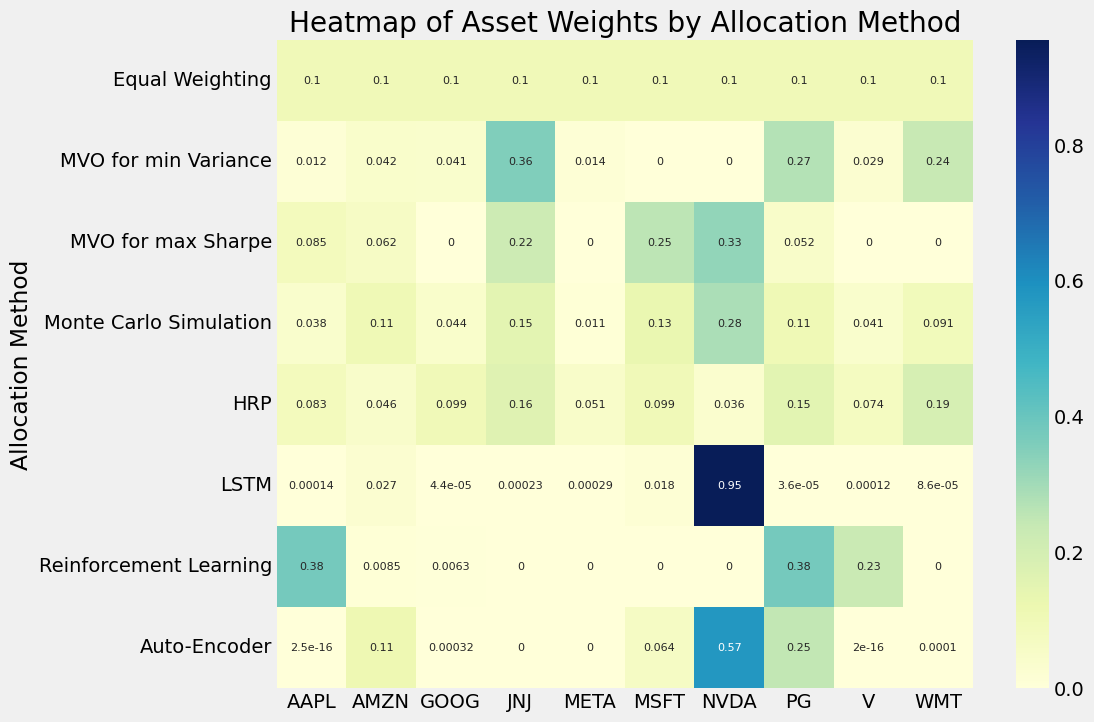

In [192]:
weights_df = pd.DataFrame(res['Weights'].tolist(), index=res['Allocation Method'], columns=df.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(weights_df, annot=True, cmap='YlGnBu', annot_kws={"size": 8})
plt.title("Heatmap of Asset Weights by Allocation Method")
plt.show()


In [193]:
import plotly.express as px

# Create the bar chart
fig = px.bar(res, x='Allocation Method', y='Profits', color='Profits', title='Profits Comparison')

# Add y-axis label
fig.update_yaxes(title_text='Profits')

# Show the plot
fig.show()
